# NTP supercell modeled with DYN3D

This Notebook demonestrates how to read cross sections from a serpent ``_res.m`` file, and write these cross sections using a template file.
In addition, this notebook shows how to execute DYN3D using the written cross sections.

In [116]:
from IPython.display import Image

**Radial cross section**

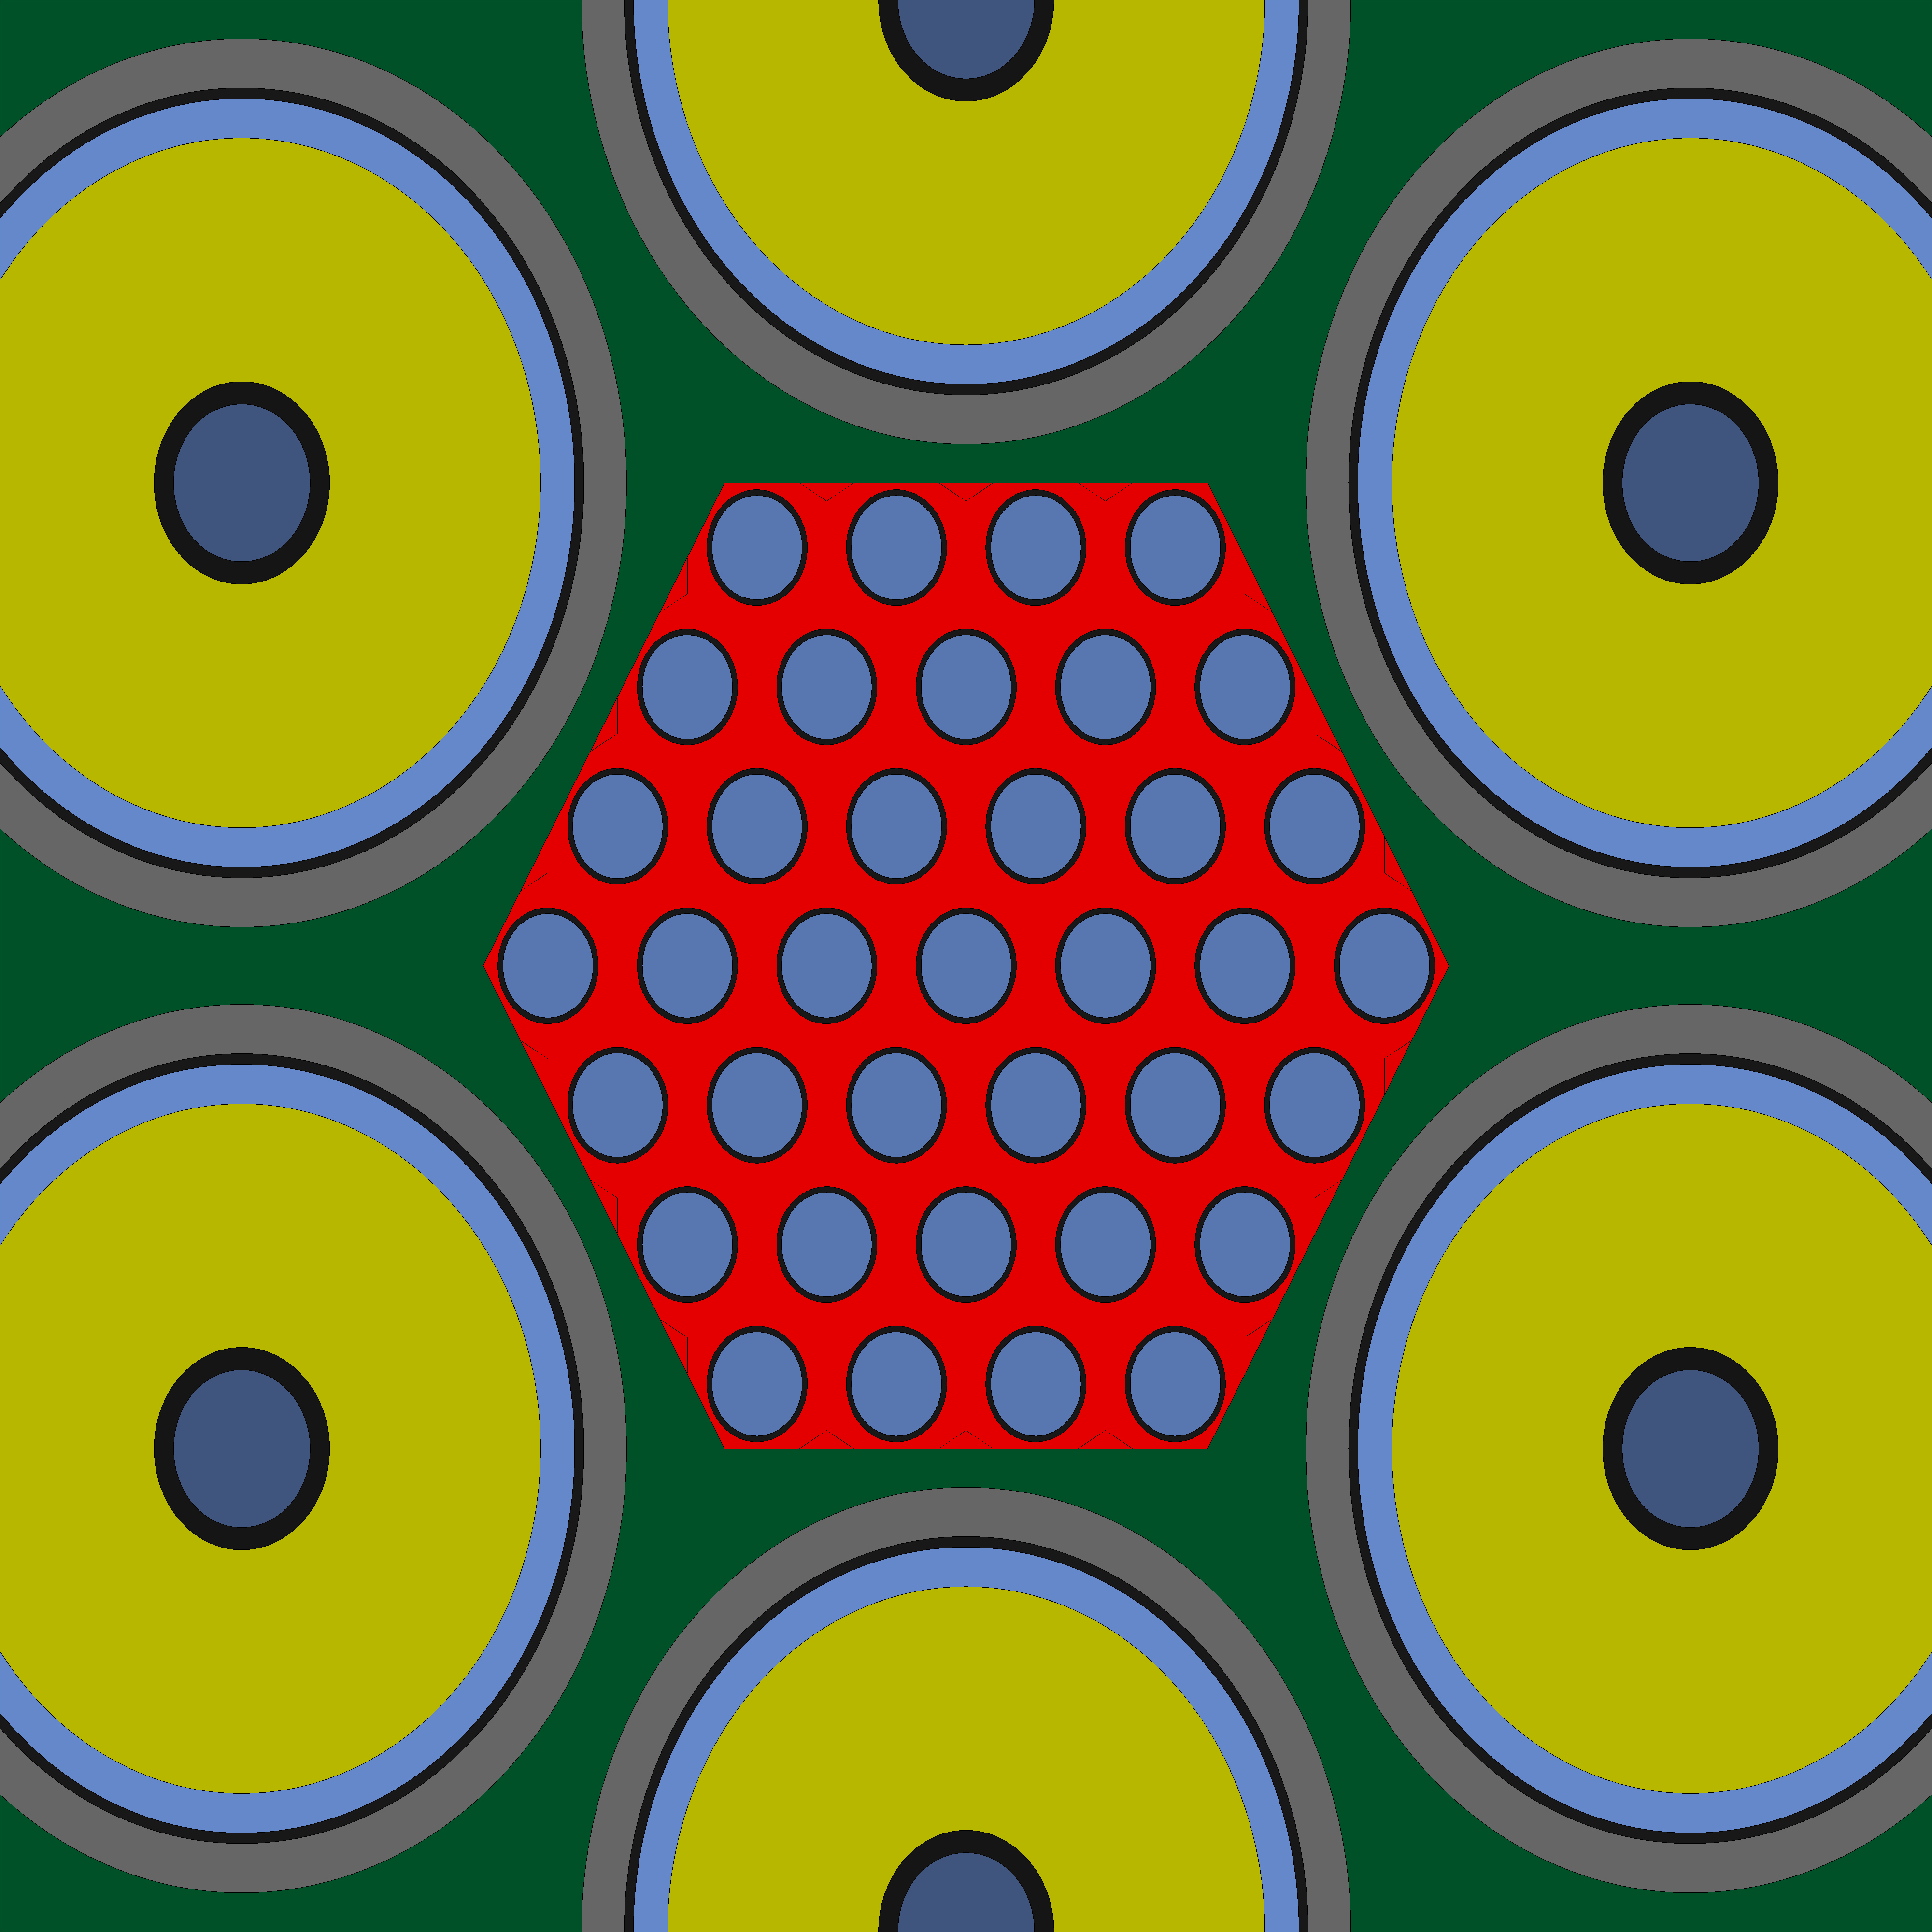

In [117]:
Image("./serpent/axial_TH_geom1.png", width=100)

**Axial cross section**

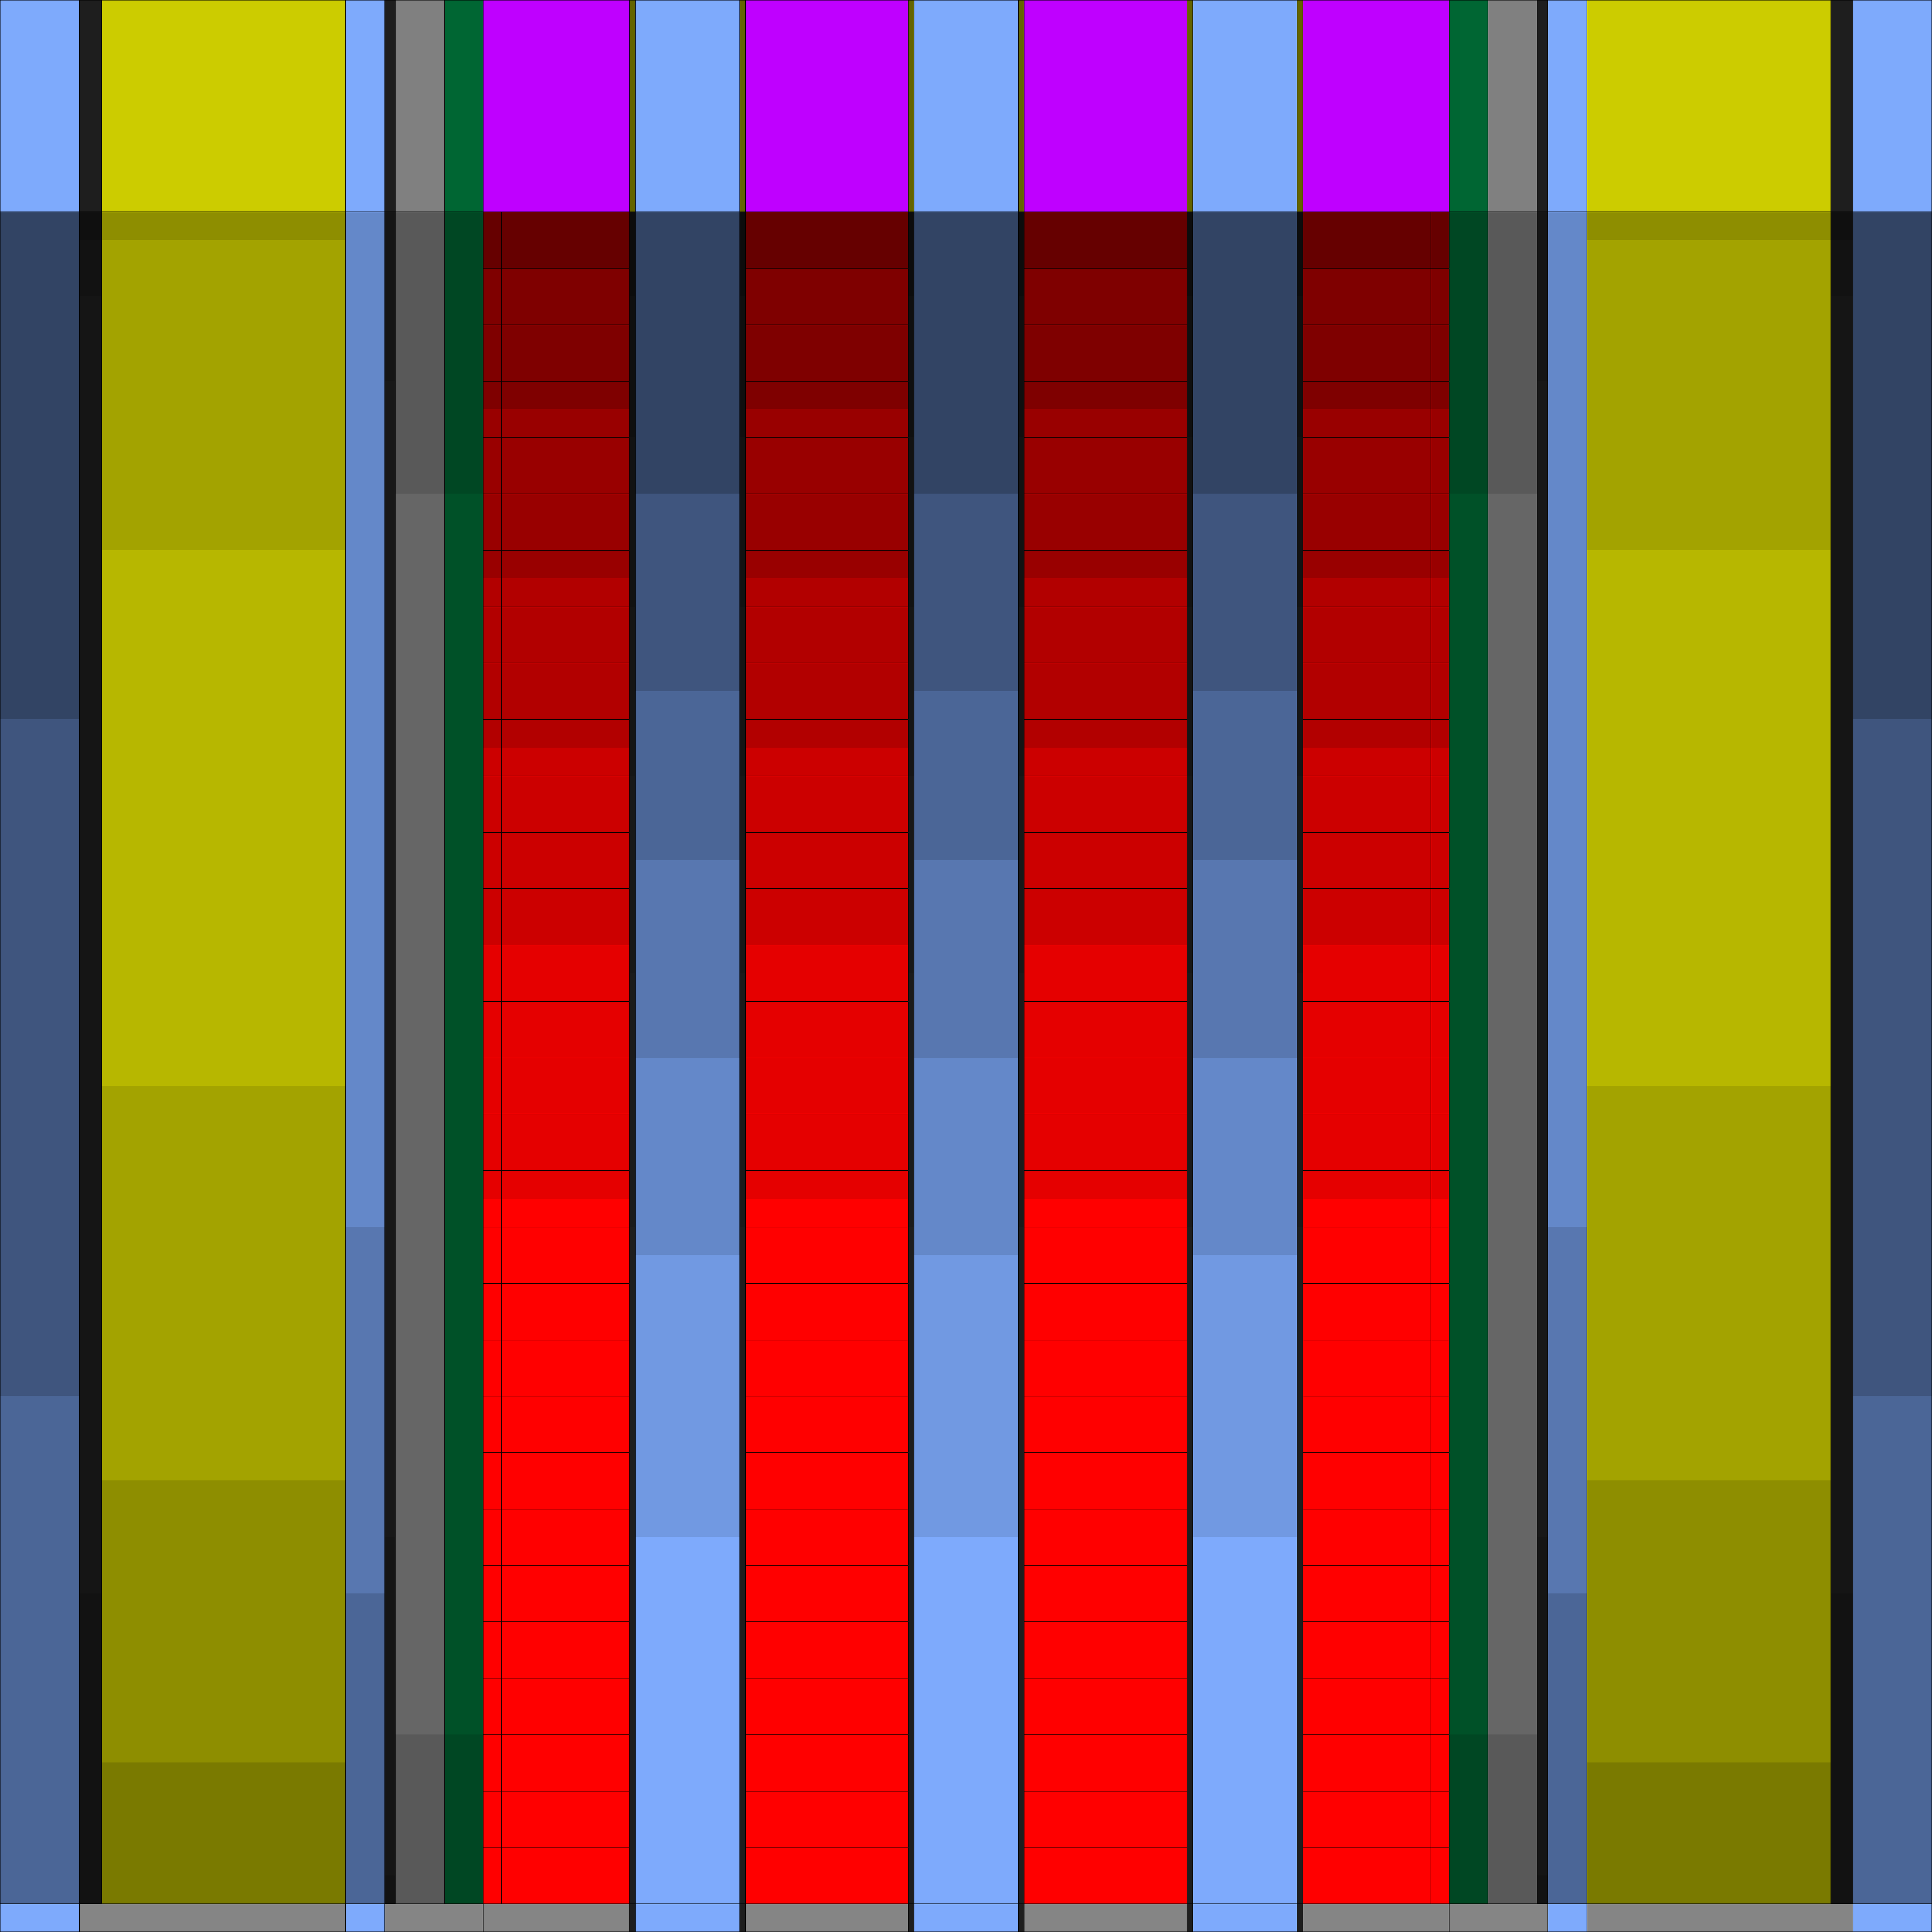

In [118]:
Image("./serpent/axial_TH_geom3.png", width=100)

### Required imports

In [119]:
from xsInterface.functions.main import Main

In [120]:
# a class required to execute DYN3D
from xsInterface.functions.dyn3d import DYN3D

In [121]:
# plotting capability
from xsInterface.functions.plotters import Plot1d
import pathlib

In [122]:
inputFile = str(pathlib.Path("./inputs/controlDict"))

### Read the cross sections

In [123]:
# Reset the main object
xs = Main(inputFile)

... Reading control dict ...
<inputs/controlDict>



#### Read xs data without populating the templates

In [124]:
# readTemplate allows to read and populate data using the templates
xs.Read(readUniverses=True)

... Reading universe <u> ...
inputs/univs
... Reading coe/_res.m file for hisotry <nom> ...


OSError: The file ./serpent/axial_th_res.m does not exist.

### Populate cross sections

**Define states**
These states must exist and be used to obtain the cross sections for different channels and layers.

In [ ]:
nchs, nlayers = 1, 34
states = {
'history':[['nom']*nlayers]*nchs, 'time': [[0.0]*nlayers]*nchs, 'dens': [[700.]*nlayers]*nchs,}

**Populate core data**
built-in capability to populate the data according to the defined map including defining new variables not listed in the original ``univs`` file.
This is a **mandaory** step if the intent is to execute DYN3D.

In [ ]:
volmanip = {'infflx': 'divide'}
xs.PopulateCoreData(
                    states=states, 
                    attributes=None,  # specify only if specific attrs needed
                    volManip=volmanip,
                    adf=None, topadf=None, bottomadf=None)

### Execute DYN3D

In [ ]:
casedir = str(pathlib.Path("./dyn3d"))   # dyn3d dir
casefile = "supercell"  # name of dyn3d file
exefile = "RUN_DYN3D" # dyn3d executuin file

# Reset the object
reslt = DYN3D(xs, casedir, casefile, exefile)

**Execute**

The files will be written to the specified directories and then automatically executed.

In [ ]:
reslt.Execute(printstatus=True)

... DYN3D Execution ... Start
... DYN3D Execution ... Ended Successfully


### Process results

In [ ]:
# eigenvalue
reslt.keff

1.339548

In [ ]:
# few-group flux
# reslt.flux

### Process results

In [ ]:
import numpy as np

The layers are defined as they were used in the actual problem

In [ ]:
layers = np.array([0, 2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54,
                      58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98, 102, 106,
                      110, 114, 118, 122, 127, 132, 137])  #active core
zmid = 0.5*(layers[0:-1] + layers[1:])

**Plot** axial distribution

In [ ]:
# flux obtained by DYN3D
dynFlux = np.array(reslt.flux)
fastFlux = dynFlux[0, :, 0] / np.sum(dynFlux[0, :, 0])
thermalFlux = dynFlux[0, :, 1] / np.sum(dynFlux[0, :, 1])

In [ ]:
flx_profiles = {'Fast': dynFlux[0, :, 0],
          'Thermal': dynFlux[0, :, 1],}

NameError: name 'dynFlux' is not defined

Built-in 1-dim plotting capability

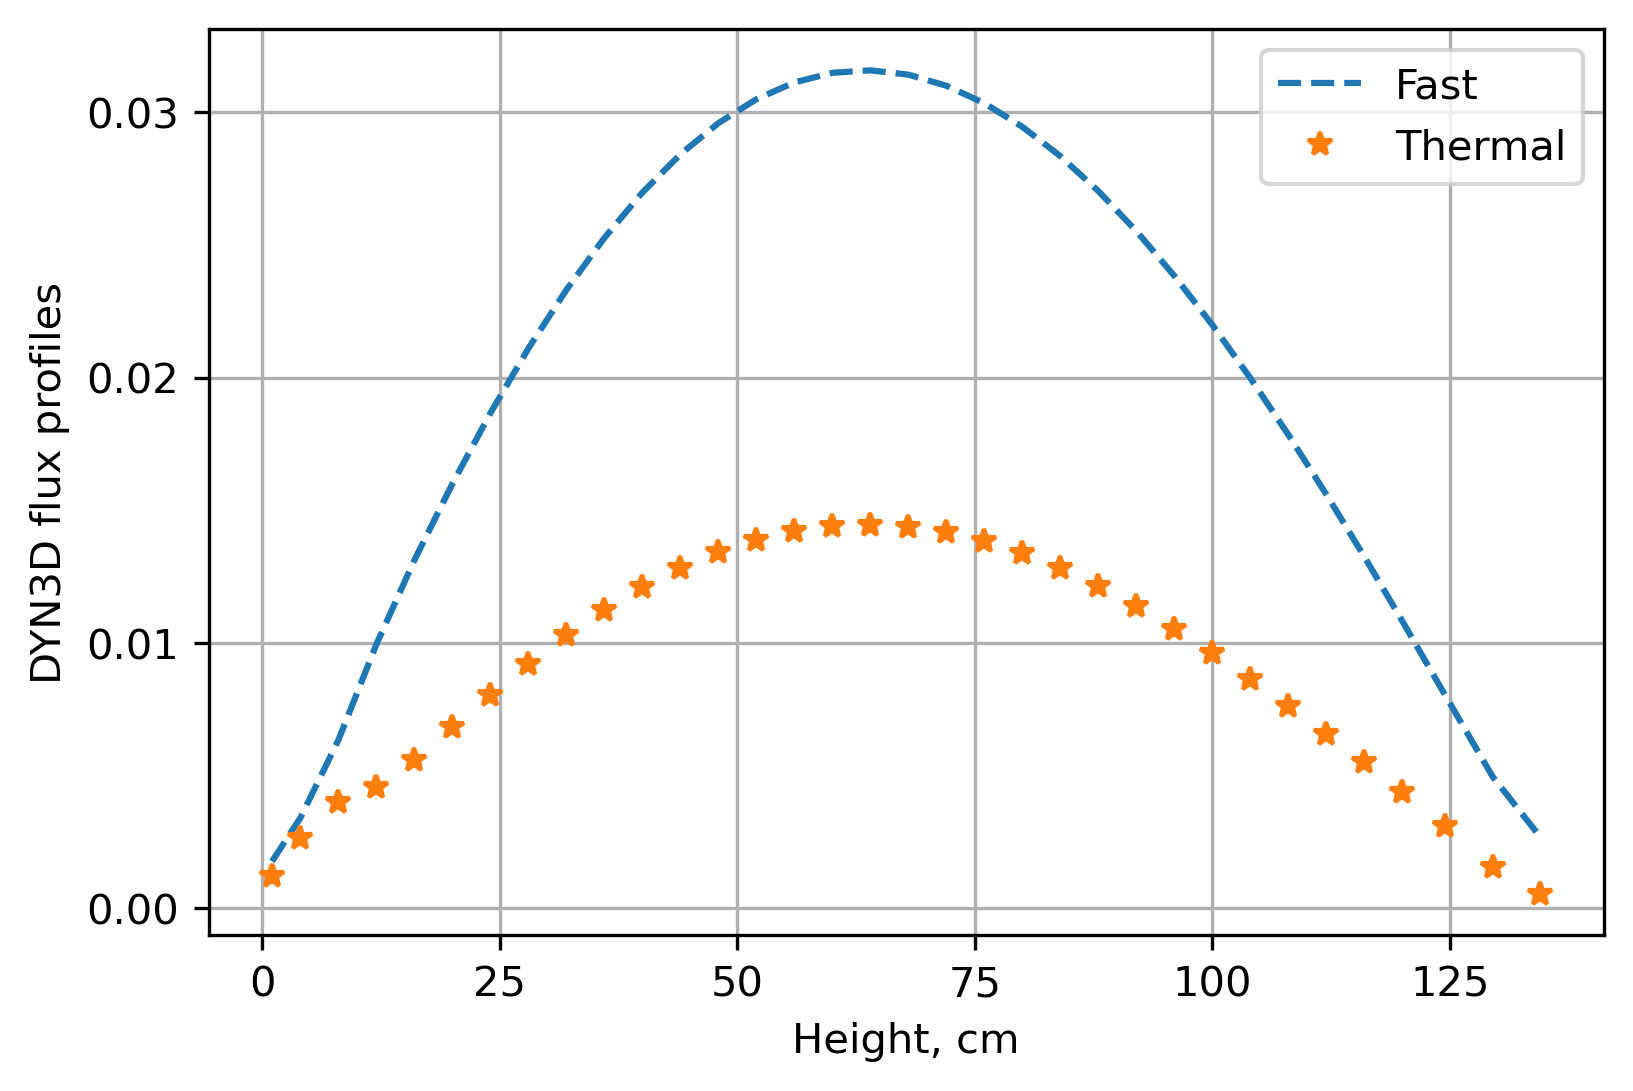

In [ ]:
Plot1d(xvalues=zmid, yvalues=flx_profiles,
       markers=['--', '*'],
       xlabel="Height, cm", ylabel="DYN3D flux profiles")